In [29]:
%matplotlib inline
# Switch to ''%matplotlib ipympl' for interactive plots
import warnings
import imp
import pickle
import lmfit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

# Styling
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [30]:
# Initialise wrapper and test datasets
wrapper_fpath = (r"..\mobius.py")
wr = imp.load_source('mobius', wrapper_fpath)
wr.initialize('persist.dll')

# Calibration functions
calib_fpath = (r"..\mobius_calib_uncert_lmfit.py")
cu = imp.load_source('mobius_calib_uncert_lmfit', calib_fpath)

In [31]:
dataset = wr.DataSet.setup_from_parameter_and_input_files('..\..\Applications\Persist\Storelva\persist_params_Storelva.dat', '..\..\Applications\Persist\Storelva\persist_inputs_Storelva.dat')

In [32]:
comparisons = [
    ('Reach flow', ['Outlet'], 'Observed discharge outlet', [])
]

In [33]:
param_df = cu.get_double_parameters_as_dataframe(dataset)
param_df

name           unit  \
0                     Snow multiplier  dimensionless   
1               Snow melt temperature             °C   
2              Degree day melt factor      mm/°C/day   
3                     Rain multiplier  dimensionless   
4                  Initial snow depth         mm SWE   
5       Degree day evapotranspiration      mm/°C/day   
6            Growing degree threshold             °C   
7                 Canopy interception         mm/day   
8                 Initial water depth             mm   
9                 Initial water depth             mm   
10                Initial water depth             mm   
11                Relative area index  dimensionless   
12                Relative area index  dimensionless   
13                Relative area index  dimensionless   
14                       Infiltration         mm/day   
15                       Infiltration         mm/day   
16                       Infiltration         mm/day   
17               Retained water depth             mm   
18               Retained water depth             mm   
19               Retained water depth             mm   
20            Drought runoff fraction  dimensionless   
21            Drought runoff fraction  dimensionless   
22            Drought runoff fraction  dimensionless   
23                      Time constant           days   
24                      Time constant           days   
25                      Time constant           days   
26      Evapotranspiration adjustment  dimensionless   
27      Evapotranspiration adjustment  dimensionless   
28      Evapotranspiration adjustment  dimensionless   
29  Relative evapotranspiration index  dimensionless   
..                                ...            ...   
50         Snow threshold temperature             °C   
51         Snow threshold temperature             °C   
52         Snow threshold temperature             °C   
53              Reach snow multiplier  dimensionless   
54              Reach snow multiplier  dimensionless   
55              Reach snow multiplier  dimensionless   
56              Reach rain multiplier  dimensionless   
57              Reach rain multiplier  dimensionless   
58              Reach rain multiplier  dimensionless   
59                   Abstraction flow           m3/s   
60                   Abstraction flow           m3/s   
61                   Abstraction flow           m3/s   
62                      Effluent flow           m3/s   
63                      Effluent flow           m3/s   
64                      Effluent flow           m3/s   
65                Initial stream flow           m3/s   
66                Initial stream flow           m3/s   
67                Initial stream flow           m3/s   
68                                  %              %   
69                                  %              %   
70                                  %              %   
71                 Percolation matrix  dimensionless   
72                 Percolation matrix  dimensionless   
73                 Percolation matrix  dimensionless   
74                 Percolation matrix  dimensionless   
75                 Percolation matrix  dimensionless   
76                 Percolation matrix  dimensionless   
77                 Percolation matrix  dimensionless   
78                 Percolation matrix  dimensionless   
79                 Percolation matrix  dimensionless   

                              index  min_value  initial_value  max_value  
0                            (All,)     0.5000       1.000000        1.5  
1                            (All,)    -4.0000       0.058533        4.0  
2                            (All,)     1.0000       1.244402        4.0  
3                            (All,)     0.5000       1.000000        1.5  
4                            (All,)     0.0000       0.000000     9999.0  
5                            (All,)     0.0500       0.161296        0.2  
6                            (All,)

In [34]:
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons)


Goodness of fit for Reach flow [Outlet] vs Observed discharge outlet []:
Mean error (bias): 0.926089
Mean absolute error: 4.400430
Mean square error: 61.467684
Nash-Sutcliffe coefficient: 0.740537
Number of observations: 3557



In [35]:
calib_df = param_df.loc[[1, 2, 5, 24, 25, 44, 45, 46, 47, 48, 49, 71, 72, 75, 76]].reset_index(drop=True)
calib_df

name           unit  \
0           Snow melt temperature             °C   
1          Degree day melt factor      mm/°C/day   
2   Degree day evapotranspiration      mm/°C/day   
3                   Time constant           days   
4                   Time constant           days   
5                               a           1/m2   
6                               a           1/m2   
7                               a           1/m2   
8                               b  dimensionless   
9                               b  dimensionless   
10                              b  dimensionless   
11             Percolation matrix  dimensionless   
12             Percolation matrix  dimensionless   
13             Percolation matrix  dimensionless   
14             Percolation matrix  dimensionless   

                            index  min_value  initial_value  max_value  
0                          (All,)     -4.000       0.058533        4.0  
1                          (All,)      1.000       1.244402        4.0  
2                          (All,)      0.050       0.161296        0.2  
3                (Soilwater, All)      1.000       1.994697     9999.0  
4              (Groundwater, All)      1.000     115.308819     9999.0  
5                        (Vegår,)      0.001       0.048173        1.0  
6                     (Nes Verk,)      0.001       0.011614        1.0  
7                       (Outlet,)      0.001       0.004529        1.0  
8                        (Vegår,)      0.300       0.328607        0.5  
9                     (Nes Verk,)      0.300       0.551378        0.5  
10                      (Outlet,)      0.300       0.467796        0.5  
11            (All, Quick, Quick)      0.000       0.242246        1.0  
12        (All, Quick, Soilwater)      0.000       0.757754        1.0  
13    (All, Soilwater, Soilwater)      0.000       0.682337        1.0  
14  (All, Soilwater, Groundwater)      0.000       0.317663        1.0

In [36]:
calib_df['short_name'] = [
    'T_melt',
    'DDfmelt',
    'DDfet',
    'T_s',
    'T_g',
    'a_V',
    'a_N',
    'a_O',
    'b_V',
    'b_N',
    'b_O',
    'runoff_r',
    'baseflow_r',
    'runoff_s',
    'baseflow_s',
]

params = cu.parameter_df_to_lmfit(calib_df)

params['baseflow_s'].set(expr = '1.0-runoff_s')
params['baseflow_r'].set(expr = '1.0-runoff_r')
params['T_s'].min = 1.0
params['T_s'].max = 2.0
params['T_g'].min = 30.0
params['T_g'].max = 200.0
params['b_V'].max = 0.7
params['b_N'].max = 0.7
params['b_O'].max = 0.7

calib_df

name           unit  \
0           Snow melt temperature             °C   
1          Degree day melt factor      mm/°C/day   
2   Degree day evapotranspiration      mm/°C/day   
3                   Time constant           days   
4                   Time constant           days   
5                               a           1/m2   
6                               a           1/m2   
7                               a           1/m2   
8                               b  dimensionless   
9                               b  dimensionless   
10                              b  dimensionless   
11             Percolation matrix  dimensionless   
12             Percolation matrix  dimensionless   
13             Percolation matrix  dimensionless   
14             Percolation matrix  dimensionless   

                            index  min_value  initial_value  max_value  \
0                          (All,)     -4.000       0.058533        4.0   
1                          (All,)      1.000       1.244402        4.0   
2                          (All,)      0.050       0.161296        0.2   
3                (Soilwater, All)      1.000       1.994697     9999.0   
4              (Groundwater, All)      1.000     115.308819     9999.0   
5                        (Vegår,)      0.001       0.048173        1.0   
6                     (Nes Verk,)      0.001       0.011614        1.0   
7                       (Outlet,)      0.001       0.004529        1.0   
8                        (Vegår,)      0.300       0.328607        0.5   
9                     (Nes Verk,)      0.300       0.551378        0.5   
10                      (Outlet,)      0.300       0.467796        0.5   
11            (All, Quick, Quick)      0.000       0.242246        1.0   
12        (All, Quick, Soilwater)      0.000       0.757754        1.0   
13    (All, Soilwater, Soilwater)      0.000       0.682337        1.0   
14  (All, Soilwater, Groundwater)      0.000       0.317663        1.0   

    short_name  
0       T_melt  
1      DDfmelt  
2        DDfet  
3          T_s  
4          T_g  
5          a_V  
6          a_N  
7          a_O  
8          b_V  
9          b_N  
10         b_O  
11    runoff_r  
12  baseflow_r  
13    runoff_s  
14  baseflow_s

In [37]:
%%time
mi, res = cu.minimize_residuals(params, dataset, comparisons, method='nelder', norm=False, skip_timesteps=365)
print('Optimization results\n')
lmfit.report_fit(res)
print('\n\nOptimized parameter values:\n')
res.params.pretty_print(precision=3)

Optimization results

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 3409
    # data points      = 3192
    # variables        = 13
    chi-square         = 157692.648
    reduced chi-square = 49.6044819
    Akaike info crit   = 12474.8006
    Bayesian info crit = 12553.6899
[[Variables]]
    T_melt:      0.06094491 +/- 0.16601381 (272.40%) (init = 0.05853334)
    DDfmelt:     1.02378453 +/- 0.02831478 (2.77%) (init = 1.244402)
    DDfet:       0.16271567 +/- 0.00319710 (1.96%) (init = 0.1612956)
    T_s:         1.76501705 +/- 0.08012853 (4.54%) (init = 1.994697)
    T_g:         115.032429 +/- 24.4323153 (21.24%) (init = 115.3088)
    a_V:         0.07403484 +/- 0.01526302 (20.62%) (init = 0.04817262)
    a_N:         0.02321566 +/- 0.00799451 (34.44%) (init = 0.0116136)
    a_O:         0.00191671 +/- 4.4348e-04 (23.14%) (init = 0.004528845)
    b_V:         0.30057137 +/- 0.00638171 (2.12%) (init = 0.3286071)
    b_N:         0.50000000 +/- 0.06087


Goodness of fit for Reach flow [Outlet] vs Observed discharge outlet []:
Mean error (bias): 0.642274
Mean absolute error: 4.101387
Mean square error: 58.452015
Nash-Sutcliffe coefficient: 0.753266
Number of observations: 3557



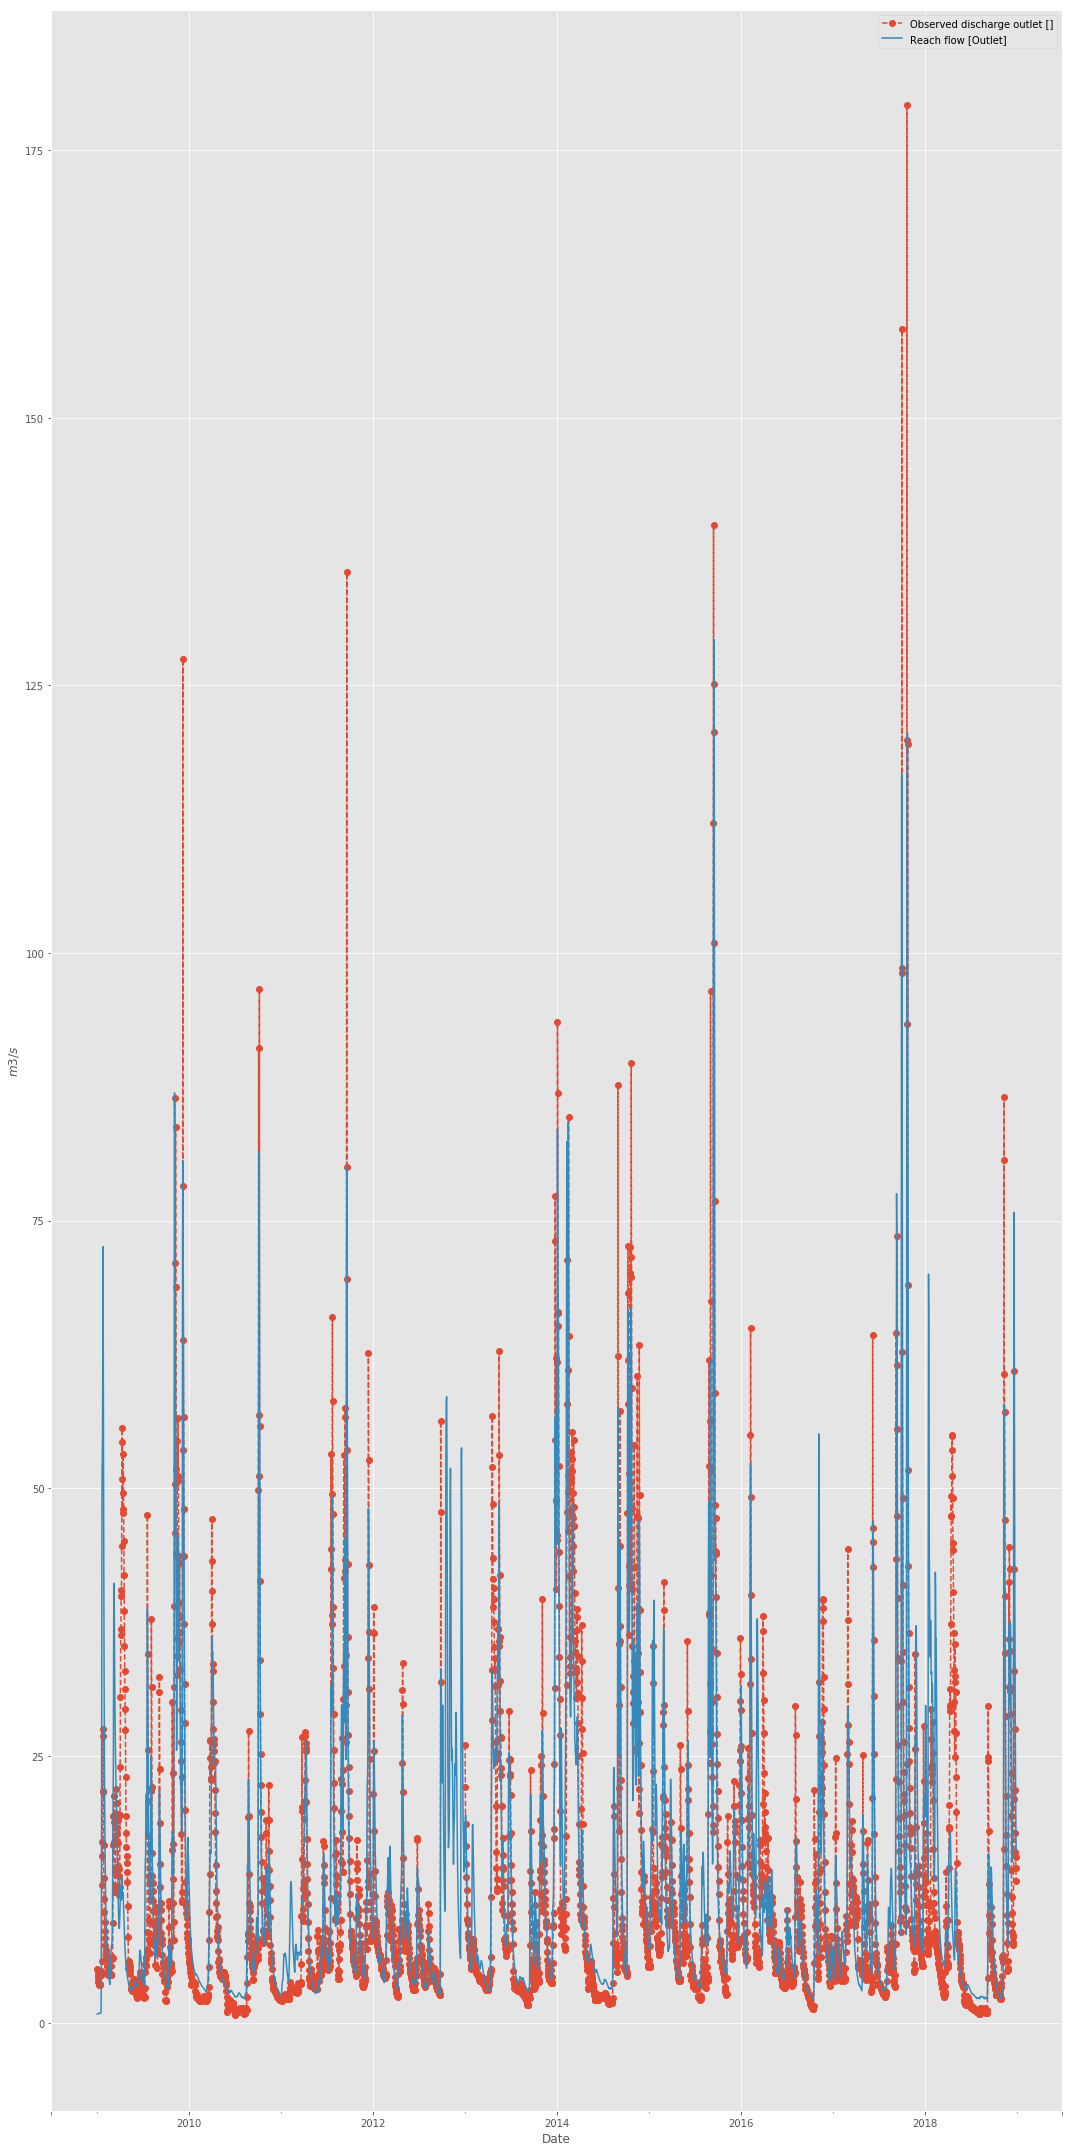

In [38]:
#print(res.params)
cu.set_parameter_values(res.params, dataset)
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons)
cu.plot_objective(dataset, comparisons)

dataset.write_parameters_to_file('optimized_params.dat')

In [41]:
res.params.add('err_q', value = 0.5, min = 0.05, max = 3)

error_param_dict = {'Observed discharge outlet': 'err_q'}

res.params

Parameters([('T_melt',
             <Parameter 'T_melt', value=0.06094490695835386 +/- 0.166, bounds=[-4.0:4.0]>),
            ('DDfmelt',
             <Parameter 'DDfmelt', value=1.0237845261051444 +/- 0.0283, bounds=[1.0:4.0]>),
            ('DDfet',
             <Parameter 'DDfet', value=0.16271566831340212 +/- 0.0032, bounds=[0.05:0.2]>),
            ('T_s',
             <Parameter 'T_s', value=1.765017045685674 +/- 0.0801, bounds=[1.0:2.0]>),
            ('T_g',
             <Parameter 'T_g', value=115.03242869163978 +/- 24.4, bounds=[30.0:200.0]>),
            ('a_V',
             <Parameter 'a_V', value=0.07403484476266324 +/- 0.0153, bounds=[0.001:1.0]>),
            ('a_N',
             <Parameter 'a_N', value=0.023215655526680253 +/- 0.00799, bounds=[0.001:1.0]>),
            ('a_O',
             <Parameter 'a_O', value=0.001916705816478107 +/- 0.000443, bounds=[0.001:1.0]>),
            ('b_V',
             <Parameter 'b_V', value=0.30057137096423964 +/- 0.00638, bounds=[0.3:0.7]>),
            ('b_N',
             <Parameter 'b_N', value=0.5000000000000001 +/- 0.0609, bounds=[0.3:0.7]>),
            ('b_O',
             <Parameter 'b_O', value=0.5995700517236248 +/- 0.0381, bounds=[0.3:0.7]>),
            ('runoff_r',
             <Parameter 'runoff_r', value=0.001447249739044143 +/- 0.00489, bounds=[0.0:1.0]>),
            ('baseflow_r',
             <Parameter 'baseflow_r', value=0.9985527502609559 +/- 0.00489, bounds=[0.0:1.0], expr='1.0-runoff_r'>),
            ('runoff_s',
             <Parameter 'runoff_s', value=0.7695784161718 +/- 0.0122, bounds=[0.0:1.0]>),
            ('baseflow_s',
             <Parameter 'baseflow_s', value=0.2304215838282 +/- 0.0122, bounds=[0.0:1.0], expr='1.0-runoff_s'>),
            ('err_q', <Parameter 'err_q', 0.5, bounds=[0.05:3]>)])

In [43]:
nworkers = 8
ntemps   = 1
nsteps   = 2000
nwalk    = 100
nburn    = 1000
thin     = 1
init_chains = 'uniform'
skip_timesteps = 365
result_path = r'pickled\\mcmc_results.pkl'
chain_plot_path = r'plots\\chains.png'
corner_plot_path = r'plots\\corner.png'

settings_dict = {'params':res.params,
                 'error_param_dict':error_param_dict,
                 'comparisons':comparisons,
                 'skip_timesteps':skip_timesteps,
                 'nworkers':nworkers,
                 'ntemps':ntemps,
                 'nsteps':nsteps,
                 'nwalk':nwalk,
                 'nburn':nburn,
                 'thin':thin,
                 'init_chains':init_chains,
                 'result_path':result_path,
                 'chain_path':chain_plot_path,
                 'corner_path':corner_plot_path,                 
                }

with open('pickled\\mcmc_settings.pkl', 'wb') as handle:
    pickle.dump(settings_dict, handle)

Time elapsed running emcee: 144.43 minutes.

Quantiles:
[(0.025, 2.6444558908779348), (0.5, 3.13354269619418), (0.975, 3.7247329441056687)]
Quantiles:
[(0.025, 2.322677774347017), (0.5, 2.638962508306701), (0.975, 3.9383305654192053)]
Quantiles:
[(0.025, 0.09444616797615477), (0.5, 0.15937582657114718), (0.975, 0.1752692190705012)]
Quantiles:
[(0.025, 1.4829600321053502), (0.5, 1.9534898862957968), (0.975, 1.9979496473612253)]
Quantiles:
[(0.025, 30.036270874149437), (0.5, 38.034461159203204), (0.975, 199.93860719312525)]


Quantiles:
[(0.025, 0.007309195338436766), (0.5, 0.047697120505800744), (0.975, 0.9923438892749021)]


Quantiles:
[(0.025, 0.00643754886156284), (0.5, 0.015810927171510534), (0.975, 0.7507955383233658)]


Quantiles:
[(0.025, 0.010847357605768916), (0.5, 0.8010402405002935), (0.975, 0.9855552794870037)]
Quantiles:
[(0.025, 0.30467589071674633), (0.5, 0.3551635516210464), (0.975, 0.6673242742985834)]
Quantiles:
[(0.025, 0.30891010293888294), (0.5, 0.423952965472612), (0.975, 0.6959940798332656)]
Quantiles:
[(0.025, 0.3758278066548109), (0.5, 0.6343525104112034), (0.975, 0.696014479977505)]
Quantiles:
[(0.025, 0.00011941659737451813), (0.5, 0.0037914698413372113), (0.975, 0.025376451964712943)]
Quantiles:
[(0.025, 0.190624491067069), (0.5, 0.5904060909560587), (0.975, 0.679216076292176)]
Quantiles:
[(0.025, 0.40341495053043075), (0.5, 0.4281578816761588), (0.975, 0.5914215198981294)]



Best sample (max log likelihood):

Goodness of fit for Reach flow [Outlet] vs Observed discharge outlet []:
Mean error (bias): 1.139377
Mean absolute error: 5.680020
Root mean square error: 10.034257
Nash-Sutcliffe coefficient: 0.564858
Number of observations: 3192



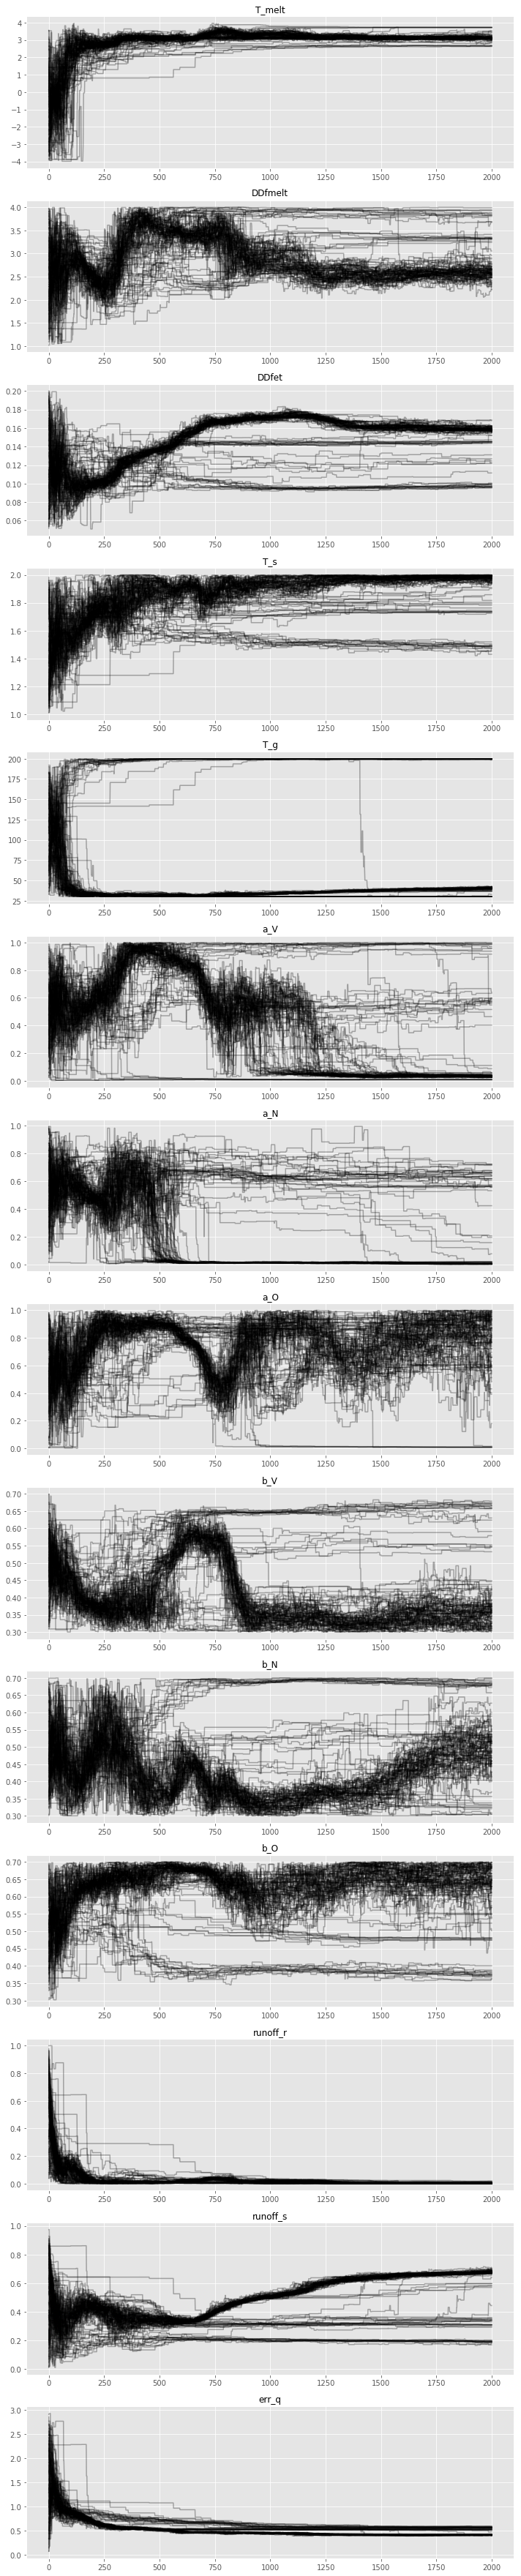

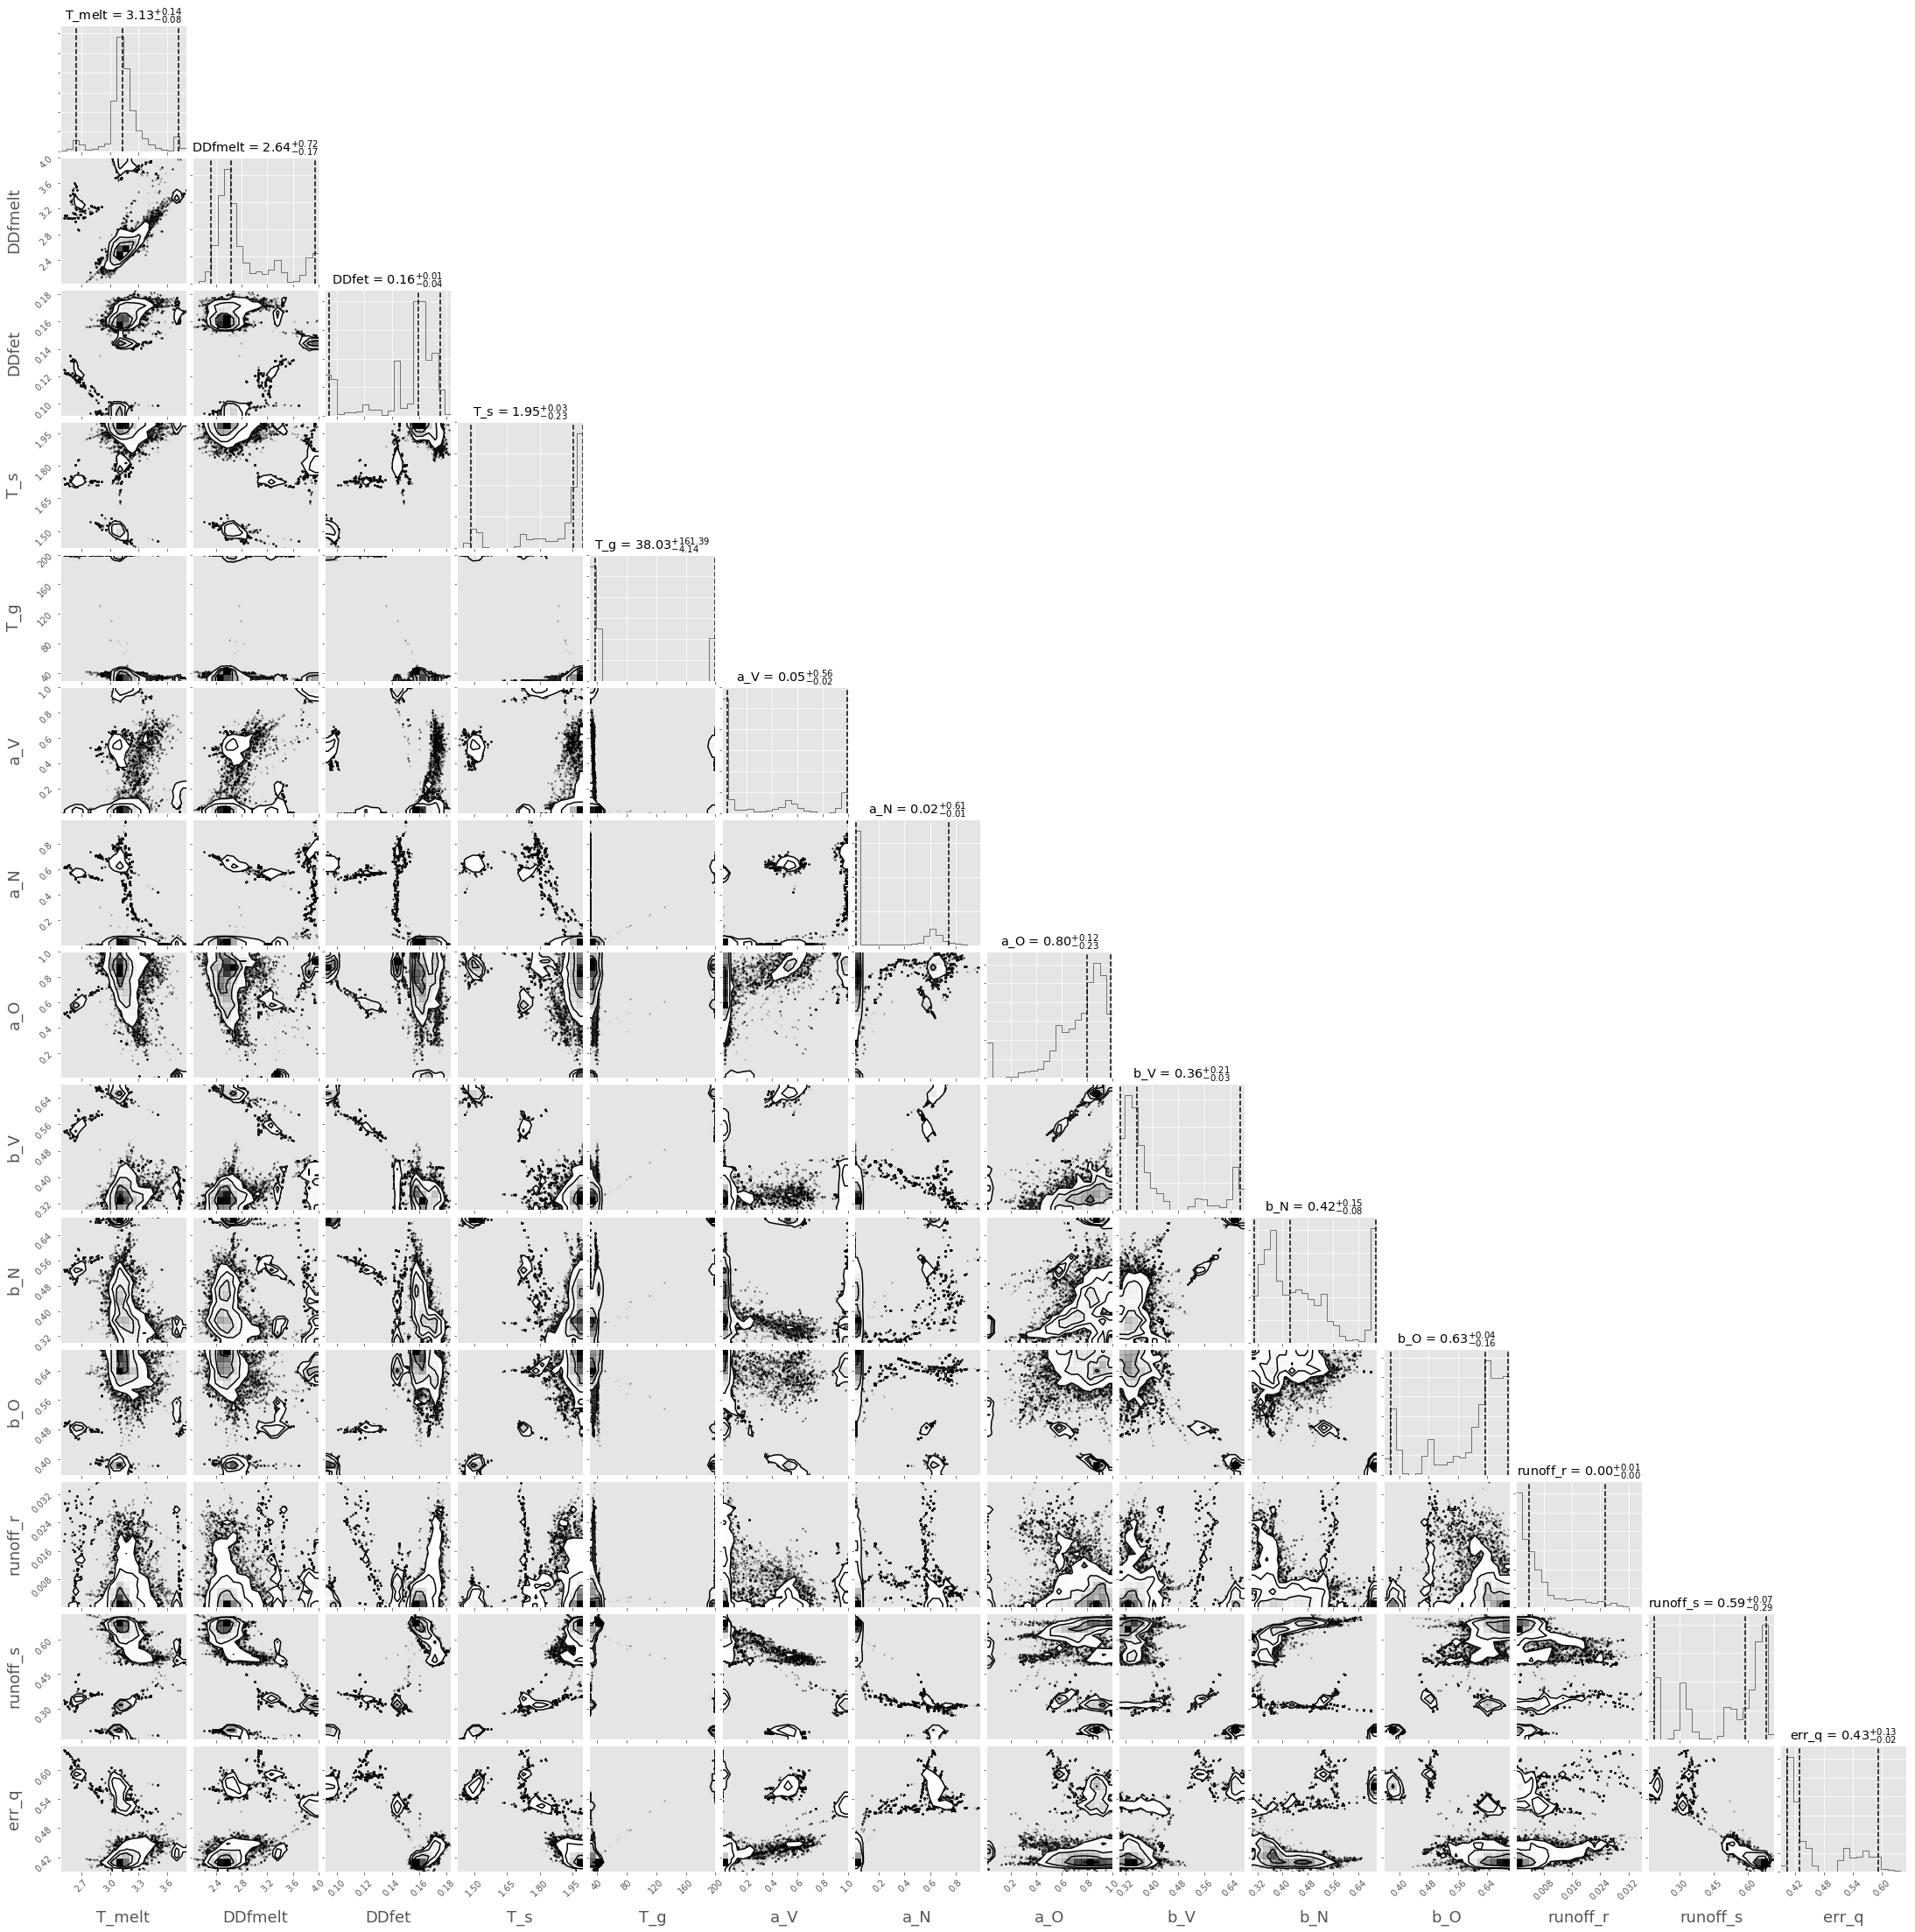

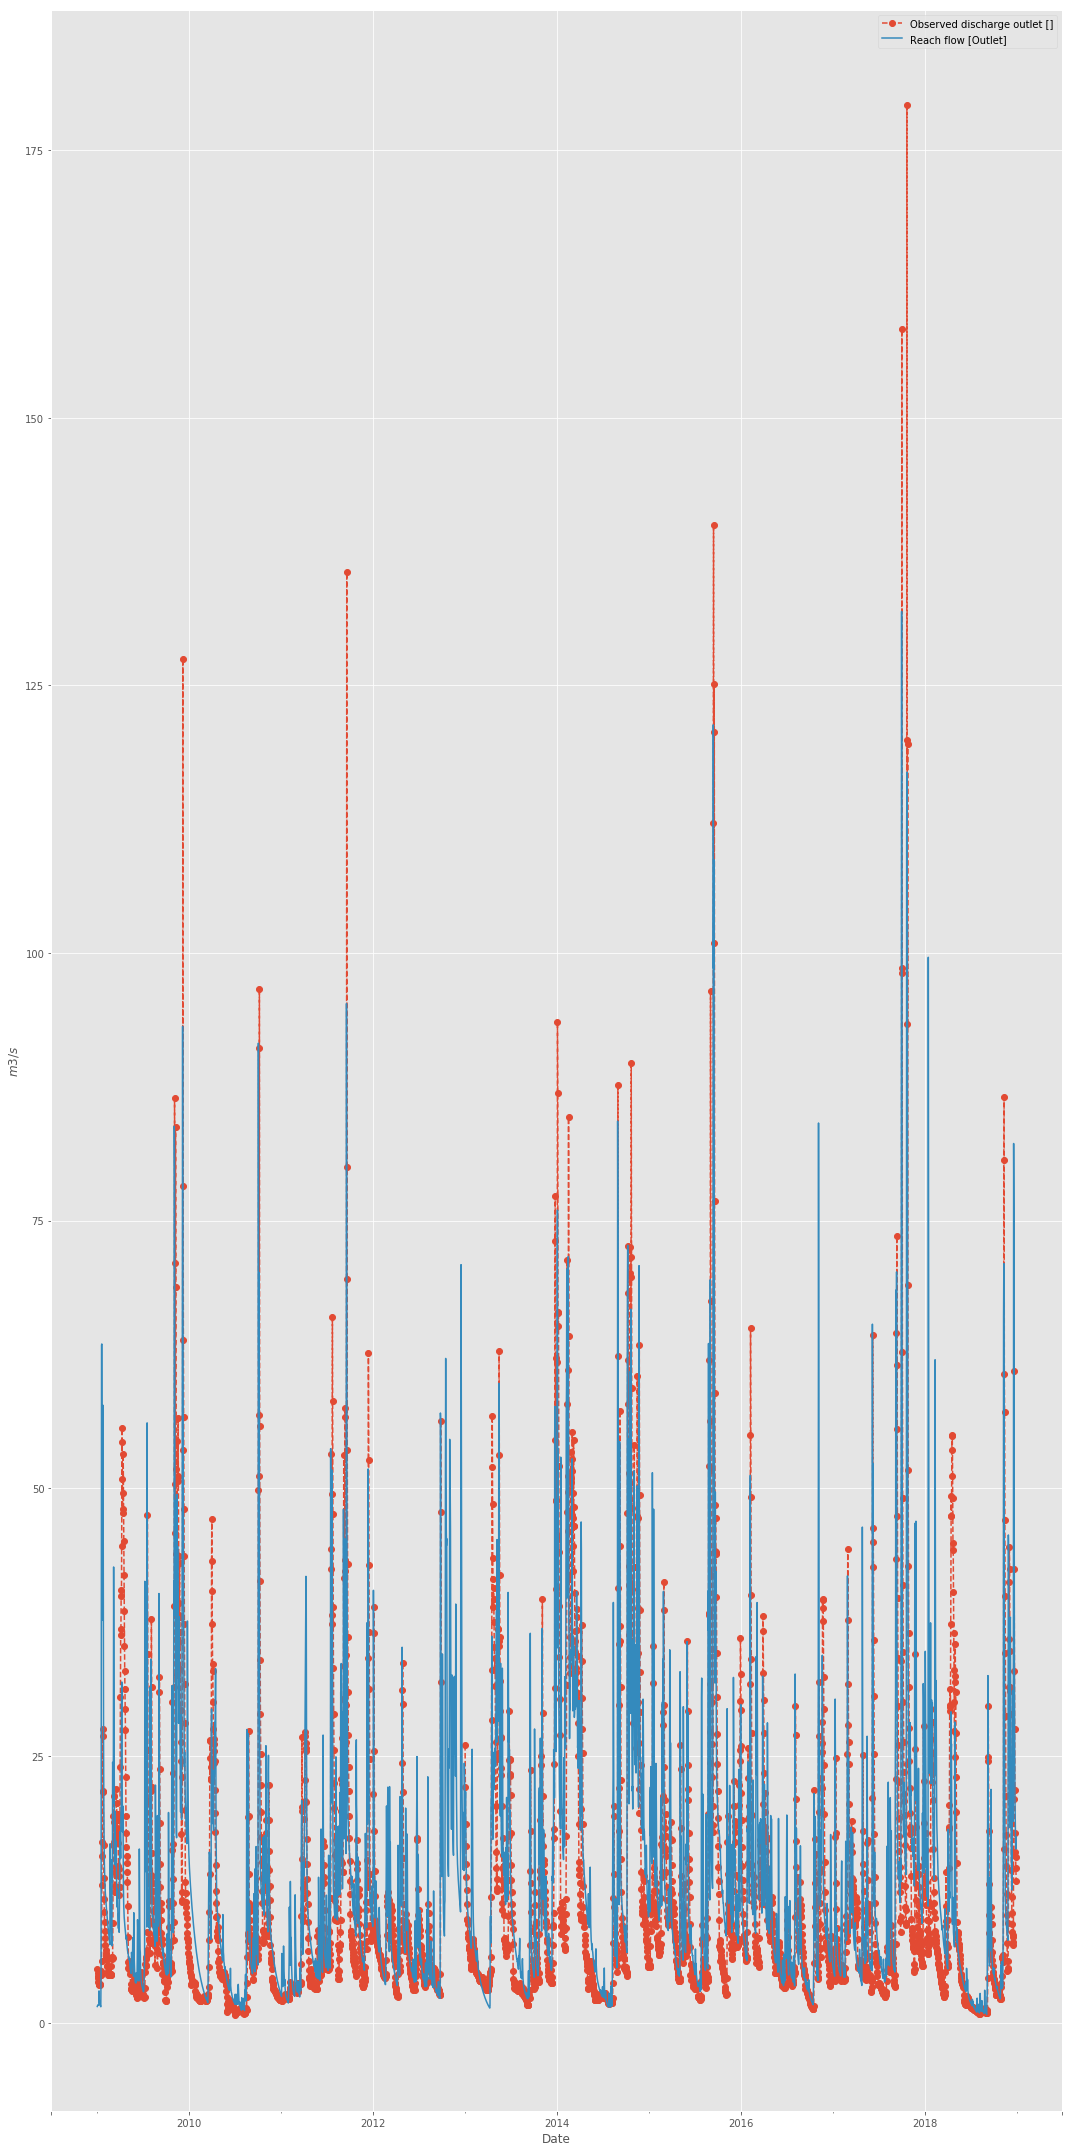

In [44]:
%run -i persist_calib_uncert.py